In [2]:
%pip install ultralytics


  Using cached ultralytics-8.3.136-py3-none-any.whl.metadata (37 kB)
  Using cached torch-2.7.0-cp313-cp313-manylinux_2_28_x86_64.whl.metadata (29 kB)
  Using cached torchvision-0.22.0-cp313-cp313-manylinux_2_28_x86_64.whl.metadata (6.1 kB)
  Using cached pandas-2.2.3-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2025.3.2-py3-none-any.whl.metadata (11 kB)
  Using cached nvidia_cudnn_cu12-9.5.1.17-py3-none-manylinux_2_28_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.6.4.1-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.3.0.4-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.7.1.2-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.6 kB)
  U


0: 448x640 85 cars, 5.3ms
Speed: 1.3ms preprocess, 5.3ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


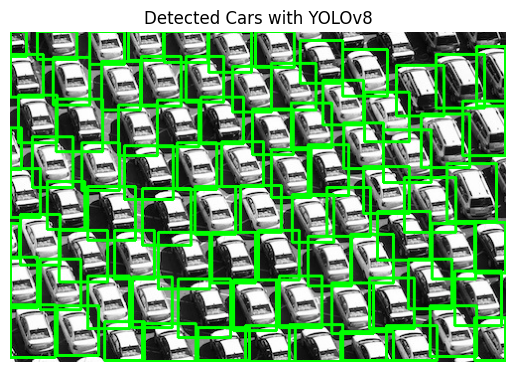

In [5]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load YOLOv8 pretrained model
model = YOLO('yolov8n.pt')  # "n" is the fastest model

# Load your image
img_path = 'parking-lot.jpg'
frame = cv2.imread(img_path)

# Predict
results = model(frame)

# Create bounding boxes
for result in results:
    for box in result.boxes:
        cls = int(box.cls[0])
        label = model.names[cls]
        if label == 'car':
            x1, y1, x2, y2 = box.xyxy[0]
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,255,0), 2)

# Convert and show
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame_rgb)
plt.axis('off')
plt.title('Detected Cars with YOLOv8')
plt.show()

